In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Assignment Data.csv')

In [ ]:
df=df[['description','variety']]
df

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Riesling
129967,Citation is given as much as a decade of bottl...,Pinot Noir
129968,Well-drained gravel soil gives this wine its c...,Gewürztraminer
129969,"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris


**exploratory data analysis**

1.   checking for missing values 
2.   drop missing values





In [ ]:
df.isnull().sum()

description    0
variety        1
dtype: int64

conclusion:
we have no missing values in description and variety ,our main work is with these two columns


check for duplicate values in description column

*   eliminate duplicated description



In [ ]:
df[df['description'].duplicated(keep=False)].sort_values('description').head()

,description,variety


In [ ]:
df=df.drop_duplicates('description')

as there is many variety of wines and we intend to apply kmeans clustering so we need to narrow down the variety to have in any clusters.we are using only those varieties which occur more than 3000 times .
 
 so we have only 9 varieties left .

In [ ]:
df['variety'].value_counts()

Pinot Noir                    12277
Chardonnay                    10867
Cabernet Sauvignon             8837
Red Blend                      8239
Bordeaux-style Red Blend       6469
                              ...  
Cabernet Sauvignon-Barbera        1
Merlot-Shiraz                     1
Folle Blanche                     1
Forcallà                          1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

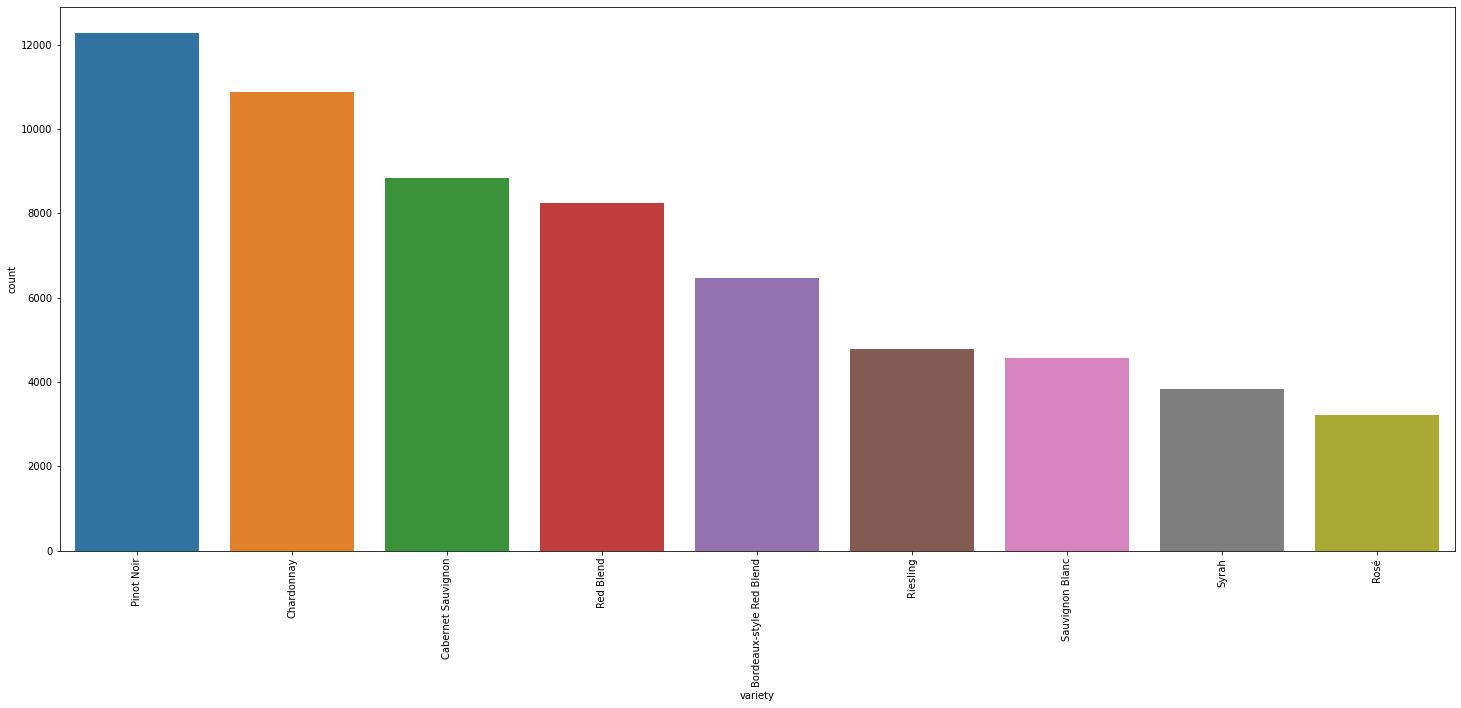

In [ ]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 3000)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
variety_df['variety'].unique()

array(['Riesling', 'Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay',
       'Red Blend', 'Sauvignon Blanc', 'Bordeaux-style Red Blend', 'Rosé',
       'Syrah'], dtype=object)

**Natural language processing **  
stopwords(the ,is etc words which do not give meaning to the prediction but use for grammer)  
tokenization(removing of punctuation from the description column)  
vectors  
stemming(reduce words to their root form)




In [ ]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = variety_df['description'].values
#we are using sklearn library to form vectors :
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [ ]:
word_features = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


["'s",
 "a'",
 "a'plenti",
 'aand',
 'aaron',
 'abacela',
 'abad',
 'abadia',
 'abandon',
 'abat',
 'abbey',
 'abbot',
 'abbott',
 'abbrevi',
 'abc',
 'abeill',
 'abeja',
 'abel',
 'abernathi',
 'aberr',
 'abetina',
 'abey',
 'abid',
 'abil',
 'abiou',
 'abl',
 'abli',
 'aboard',
 'abondant',
 'aborigin',
 'abound',
 'abouriou',
 'abov',
 'abras',
 'abreu',
 'abri',
 'abroad',
 'abrupt',
 'abruzzo',
 'absberg',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abtsberg',
 'abund',
 'abus',
 'abut',
 'abuzz',
 'abv']

In [ ]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

**kmeans clustering**

In [ ]:
kmeans = KMeans(n_clusters = 9, n_init = 5)
kmeans.fit(X3)

KMeans(n_clusters=9, n_init=5)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : flavor, fruit, wine, finish, cherri, aroma, berri, red, palat, note
1 : cabernet, sauvignon, merlot, blend, franc, petit, verdot, malbec, black, cherri
2 : chardonnay, pineappl, flavor, oak, butter, toast, vanilla, pear, appl, tropic
3 : lemon, appl, lime, finish, palat, flavor, citrus, fresh, riesl, peach
4 : black, cherri, palat, aroma, pepper, tannin, plum, spice, offer, alongsid
5 : wine, fruit, age, structur, tannin, wood, ripe, rich, firm, drink
6 : blackberri, flavor, currant, tannin, oak, cabernet, cherri, wine, rich, dri
7 : wine, fruiti, acid, drink, crisp, fruit, attract, textur, readi, light
8 : pinot, noir, cherri, raspberri, silki, cola, flavor, acid, drink, dri


In [ ]:
variety_df['cluster'] = kmeans.labels_

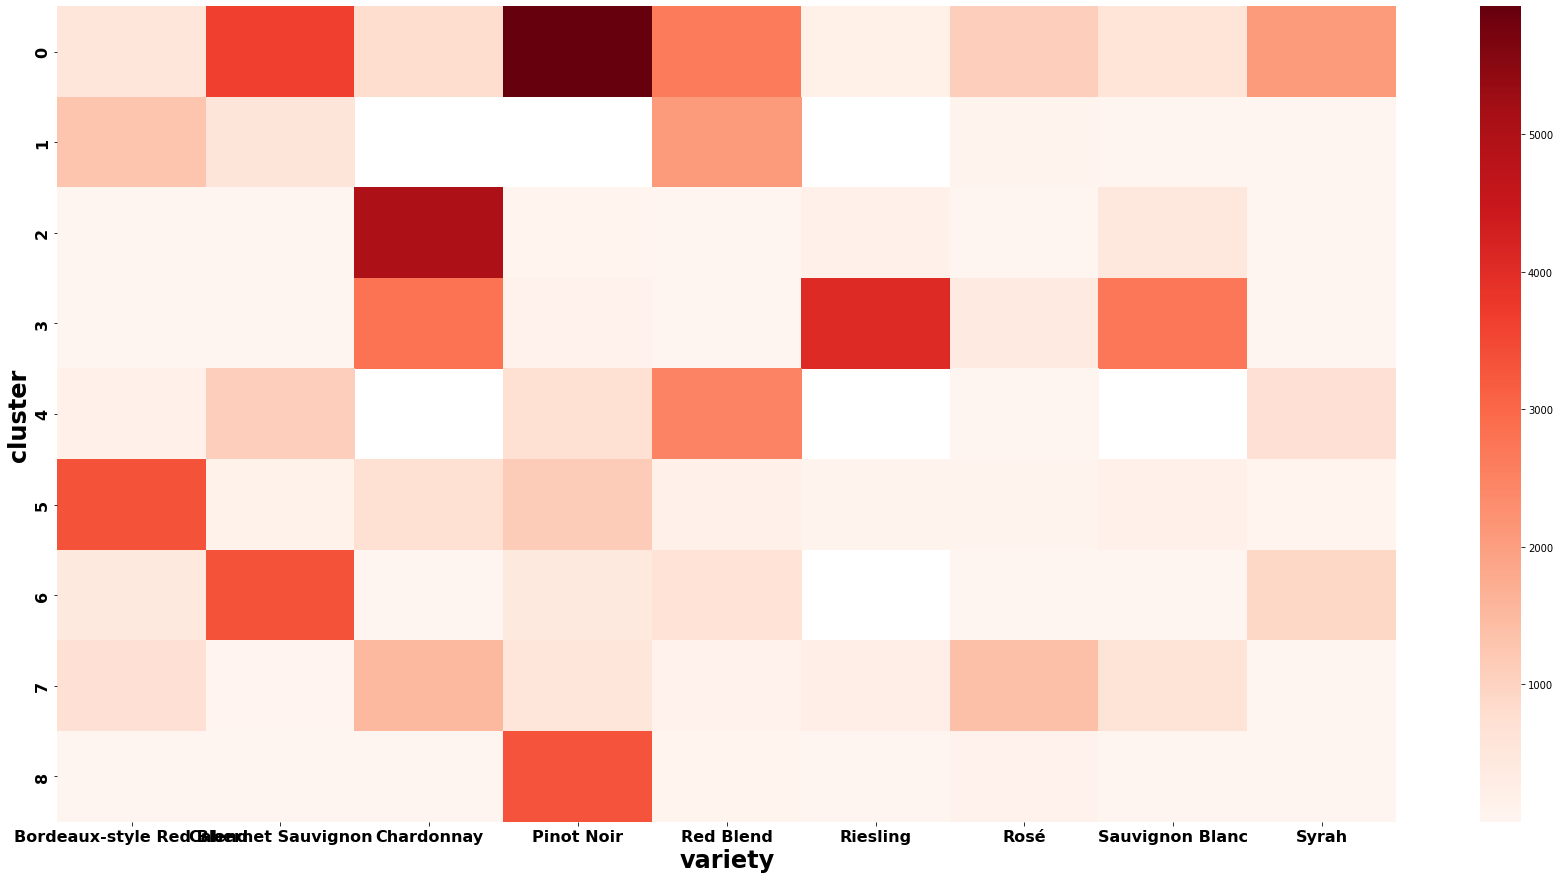

In [ ]:
clusters = variety_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

conclusion :  
we did not find a one to one relationship in each of the 9 varieties we should need another model ro